Names: Richard Cai (rjc432), Wenkai Zhao (wz459)

Topic:


1.   Effect of exports of different natural resources on curruption index and/or country's economy. Read on the "[resource curse](https://wikipedia.org/wiki/resource_curse)" and "[dutch disease](https://wikipedia.org/wiki/dutch_disease)" on [Wikipedia.org](https://Wikipedia.org).
2.   List item



Dataset Source: Plan on using [comtradeplus.un.org](https://comtradeplus.un.org)
[Oil dataset](https://comtradeplus.un.org/TradeFlow?Frequency=A&Flows=X&CommodityCodes=2709&Partners=0&Reporters=all&period=all&AggregateBy=none&BreakdownMode=plus)

**Abstract:**

**Write-Up:**



1.   We wish to prove or disprove that increased HDI is correlated with increased raw resource exports.
2.   We wish to able to fit a trendline to a graph of HDI vs resource exports.
3.   We wish to develop a score that measures how badly a country has used its resource exports.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/My Drive/INFO 1998 Project/cleanedcoaldata.csv')

cereals = pd.read_csv("/content/RCereals.csv_with_HDI.csv")
inorganic = pd.read_csv("/content/RInorganic.csv_with_HDI.csv")
mineral = pd.read_csv("/content/RMineral.csv_with_HDI.csv")
ores = pd.read_csv("/content/ROres.csv_with_HDI.csv")
wood = pd.read_csv("/content/RWood.csv_with_HDI.csv")

all_exports = [cereals,inorganic,mineral,ores,wood]


In [ ]:
print(cereals.head())
print(inorganic.head())
print(mineral.head())
print(ores.head())
print(wood.head())

print(cereals.size)
print(inorganic.size)
print(mineral.size)
print(ores.size)
print(wood.size)

   year  country_code country_code_letter  dollar_value  HDI_value
0  2013           533                 ABW      1362.000        NaN
1  2014           533                 ABW     11244.000        NaN
2  2016           533                 ABW    620102.470        NaN
3  2017           533                 ABW    251573.735        NaN
4  2018           533                 ABW       315.642        NaN
   year  country_code country_code_letter  dollar_value  HDI_value
0  2013             8                 ALB  9.011200e+05      0.793
1  2013            12                 DZA  3.437782e+08      0.729
2  2013            20                 AND  2.636740e+02      0.851
3  2013            31                 AZE  1.019504e+07      0.745
4  2013            32                 ARG  3.301719e+08      0.846
   year  country_code country_code_letter  dollar_value  HDI_value
0  2013            68                 BOL  6.682832e+09      0.681
1  2013            70                 BIH  6.477486e+08      0

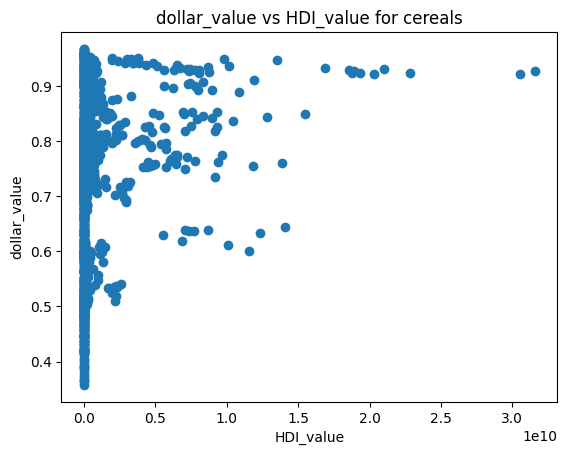

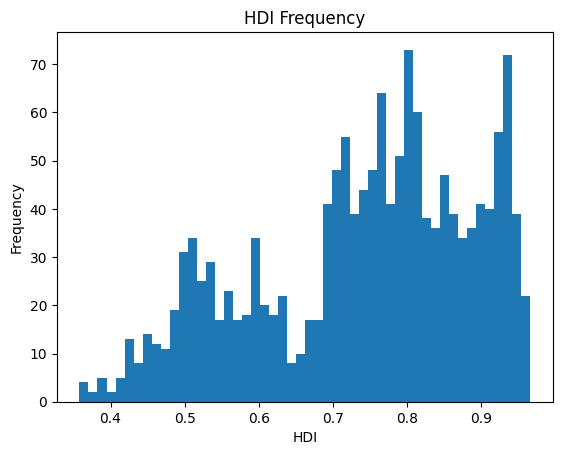

Cereals      0.190501
Inorganic    0.258185
Mineral       0.27029
Ores         0.136147
Wood         0.313888
Name: HDI Correlation, dtype: object


In [ ]:
fig2D = plt.figure()

# plt.acorr()

plt.scatter(cereals['dollar_value'],cereals['HDI_value'])

plt.title('dollar_value vs HDI_value for cereals')
plt.xlabel('HDI_value')
plt.ylabel('dollar_value')

plt.show()

plt.hist(cereals['HDI_value'], 50, align='mid')
# Add a title
plt.title('HDI Frequency')
# Add x and y labels
plt.xlabel('HDI')
plt.ylabel('Frequency')
# Show the plot!
plt.show()

# Calculate the correlation for each resource
labels = ['Cereals', 'Inorganic', 'Mineral', 'Ores', 'Wood']
correlation_df = pd.DataFrame(index=labels, columns=['HDI Correlation'])
for data, label in zip(all_exports, labels):
    # Ensure both columns are numeric before calculating correlation
    correlation = data['dollar_value'].astype(float).corr(data['HDI_value'].astype(float))
    correlation_df.loc[label, 'HDI Correlation'] = correlation
print(correlation_df.iloc[:, 0])

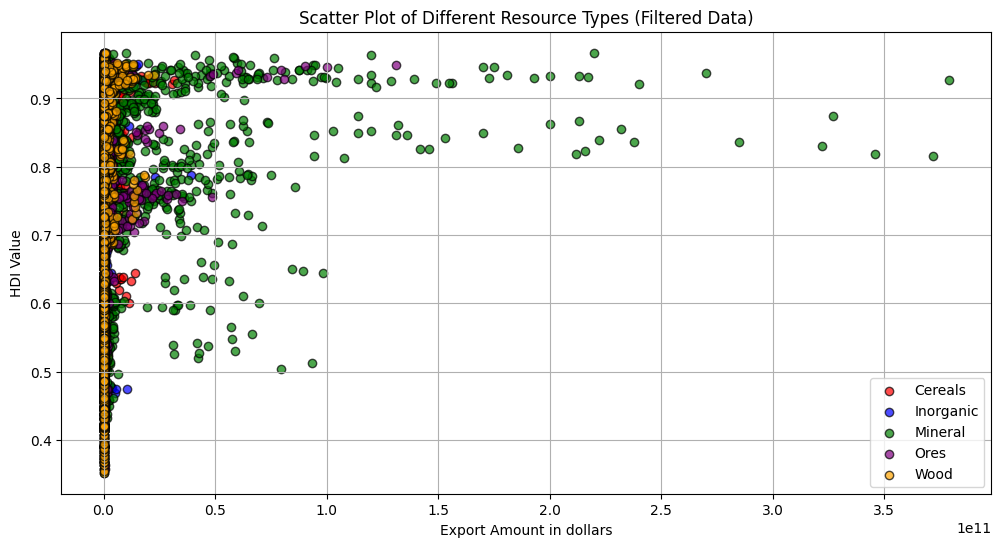

In [ ]:
# 统一列名
new_col_names = ['Export Amount in dollars', 'HDI Value']
datasets = [cereals, inorganic, mineral, ores, wood]

for data in datasets:
    data.rename(columns={data.columns[3]: new_col_names[0], data.columns[4]: new_col_names[1]}, inplace=True)

# 颜色和标签
colors = ['red', 'blue', 'green', 'purple', 'orange']
labels = ['Cereals', 'Inorganic', 'Mineral', 'Ores', 'Wood']

# 创建散点图
plt.figure(figsize=(12, 6), dpi=100)

for data, color, label in zip(datasets, colors, labels):
    # 去除 "Export Amount in dollars" 和 "HDI Value" 为空或为 0 的行
    data_clean = data.dropna(subset=new_col_names)
    data_clean = data_clean[(data_clean[new_col_names[0]] != 0) & (data_clean[new_col_names[1]] != 0)]

    # 画散点图
    plt.scatter(data_clean[new_col_names[0]], data_clean[new_col_names[1]],
                c=color, label=label, alpha=0.7, edgecolors='k')

# 添加图例和标签
plt.xlabel("Unscaled Export Amount in dollars")
plt.ylabel("HDI Value")
plt.title("Scatter Plot of Different Resource Types (Filtered Data)")
plt.legend()
plt.grid(True)

# 显示图表
plt.show()


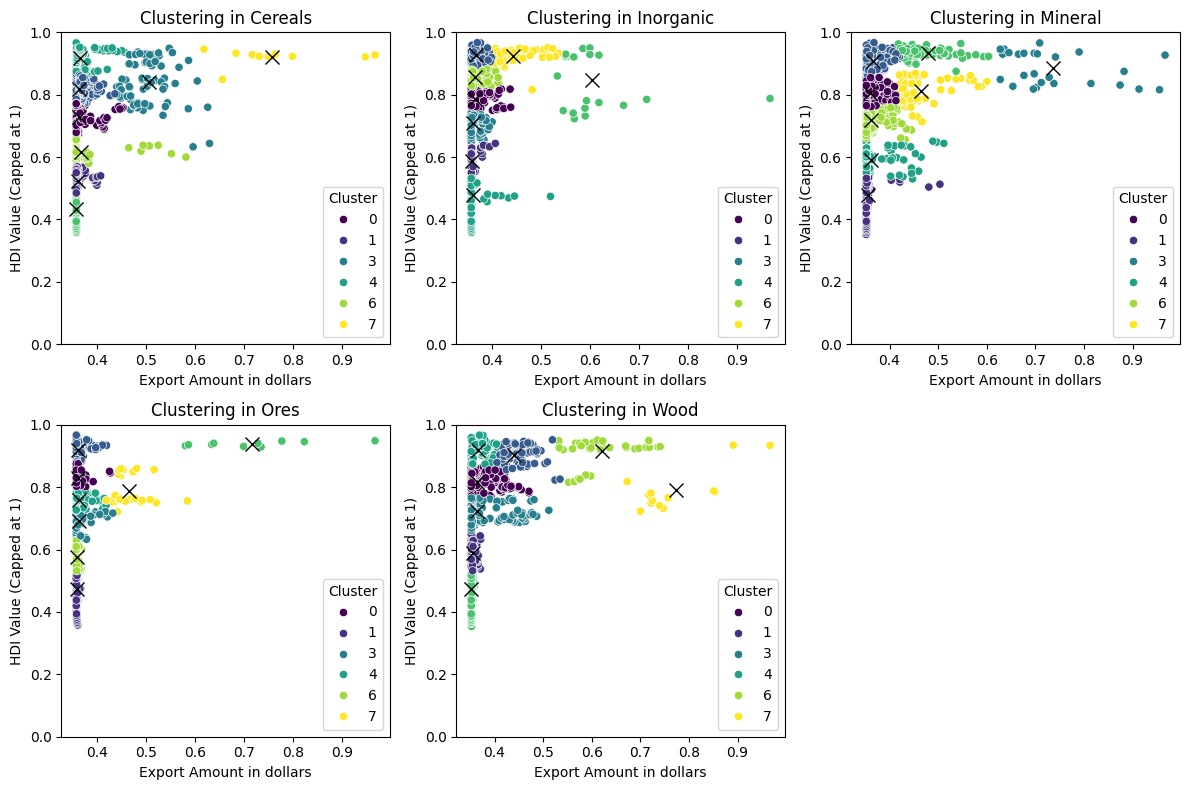

In [ ]:
fig = plt.figure(figsize=(12, 8))  # 12x8 inches (you can change these numbers as needed)
for i, (data, color, label) in enumerate(zip(datasets, colors, labels), 1):
    data_clean = clean_data(data).copy()  # Keep all original columns

    # Normalize only the relevant columns while keeping the full dataset
    data_clean = normalize_column(data_clean, data.columns[3], data.columns[4])

    # Perform K-Means Clustering using only the two relevant columns
    kmeans = KMeans(n_clusters=8, random_state=42)
    data_clean["Cluster"] = kmeans.fit_predict(data_clean.iloc[:, [3, 4]])  # Use selected columns but keep full dataset

    centroids = kmeans.cluster_centers_

    # Create individual subplots for clustering
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data_clean.iloc[:, 3], y=data_clean.iloc[:, 4], hue=data_clean["Cluster"], palette="viridis")
    plt.xlabel("Scaled Export Amount")
    plt.ylabel("Scaled HDI Value")
    plt.title(f"Clustering in {label}")
    plt.ylim(0, 1)
    for j in range(kmeans.n_clusters):
        plt.plot(centroids[j, 0], centroids[j, 1], 'kx', markersize=10)

    # Extract and print clustered data for each dataset
    # print(f"=== Clustering Results for {label} ===")
    # for j in range(kmeans.n_clusters):
    #     cluster_data = data_clean[data_clean["Cluster"] == j]  # Keeps all original columns
    #     print(f"Cluster {j} data for {label}:")
    #     print(cluster_data)
        # Saving the data to a CSV
        # cluster_data.to_csv(f"cluster_{j}_data_{label}.csv", index=False)

plt.tight_layout()
plt.show()

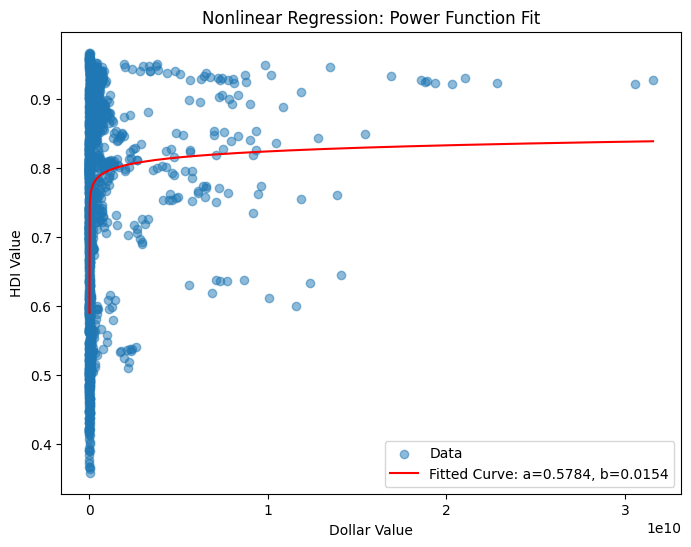

Model Parameters: a = 0.5784, b = 0.0154
R-squared: 0.0981


In [ ]:
# Read data
file_path = "/content/RCereals.csv_with_HDI.csv"
df = pd.read_csv(file_path)

# Filter out missing values
df_filtered = df[['dollar_value', 'HDI_value']].dropna()

# Define power function model: HDI = a * (dollar_value^b)
def power_law(x, a, b):
    return a * np.power(x, b)

# Getting data
x_data = df_filtered['dollar_value'].values
y_data = df_filtered['HDI_value'].values

# Perform curve fitting
params, covariance = curve_fit(power_law, x_data, y_data, p0=[0, 0.1])

# Predictive value
y_pred = power_law(x_data, *params)

# Calculate R-squared
ss_res = np.sum((y_data - y_pred) ** 2)
ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Generate curve for plotting
x_fit = np.linspace(min(x_data), max(x_data), 2000)
y_fit = power_law(x_fit, *params)

# Draw a fitting curve
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, alpha=0.5, label="Data")
plt.plot(x_fit, y_fit, color='red', label=f"Fitted Curve: a={params[0]:.4f}, b={params[1]:.4f}")

# Set the horizontal axis unit to 1e10
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1e10))
plt.xlabel("Dollar Value")
plt.ylabel("HDI Value")
plt.title("Nonlinear Regression: Power Function Fit")
plt.legend()
plt.show()

# Output fitting parameters and R-squared
print(f"Model Parameters: a = {params[0]:.4f}, b = {params[1]:.4f}")
print(f"R-squared: {r_squared:.4f}")

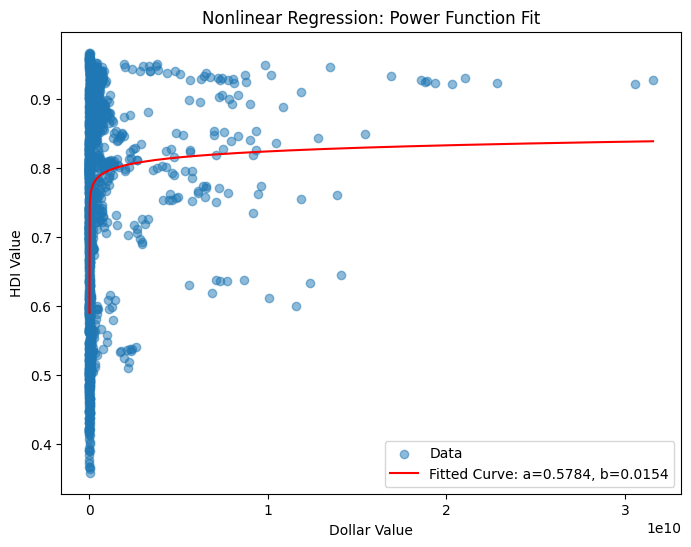

Model Parameters: a = 0.5784, b = 0.0154
R-squared: 0.0981


In [ ]:
# Read data
file_path = "/content/RInorganic.csv_with_HDI.csv"
df = cereals

# Filter out missing values
#df_filtered = df[['dollar_value', 'HDI_value']].dropna()

# Define power function model: HDI = a * (dollar_value^b)
def power_law(x, a, b):
    return a * np.power(x, b)

# Getting data
x_data = df_filtered['dollar_value'].values
y_data = df_filtered['HDI_value'].values

# Perform curve fitting
params, covariance = curve_fit(power_law, x_data, y_data, p0=[0, 0.1])

# Predictive value
y_pred = power_law(x_data, *params)

# Calculate R-squared
ss_res = np.sum((y_data - y_pred) ** 2)
ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Generate curve for plotting
x_fit = np.linspace(min(x_data), max(x_data), 2000)
y_fit = power_law(x_fit, *params)

# Draw a fitting curve
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, alpha=0.5, label="Data")
plt.plot(x_fit, y_fit, color='red', label=f"Fitted Curve: a={params[0]:.4f}, b={params[1]:.4f}")

# Set the horizontal axis unit to 1e10
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1e10))
plt.xlabel("Dollar Value")
plt.ylabel("HDI Value")
plt.title("Nonlinear Regression: Power Function Fit")
plt.legend()
plt.show()

# Output fitting parameters and R-squared
print(f"Model Parameters: a = {params[0]:.4f}, b = {params[1]:.4f}")
print(f"R-squared: {r_squared:.4f}")

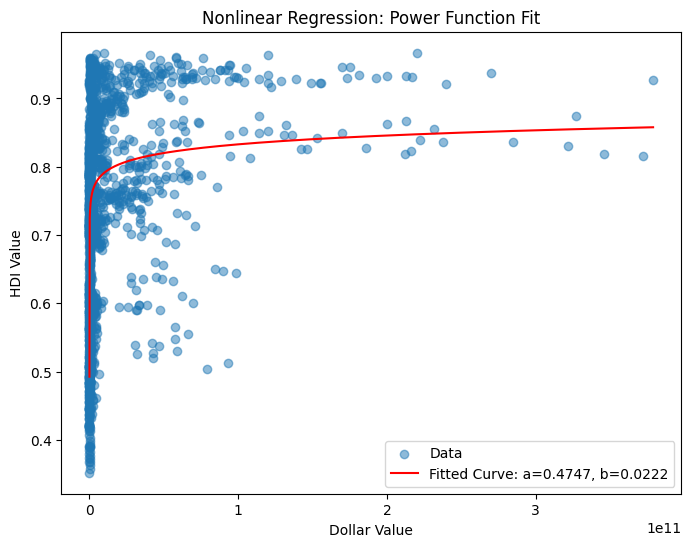

Model Parameters: a = 0.4747, b = 0.0222
R-squared: 0.2051


In [ ]:
# Read data
file_path = "/content/RMineral.csv_with_HDI.csv"
df = pd.read_csv(file_path)

# Filter out missing values
df_filtered = df[['dollar_value', 'HDI_value']].dropna()

# Define power function model: HDI = a * (dollar_value^b)
def power_law(x, a, b):
    return a * np.power(x, b)

# Getting data
x_data = df_filtered['dollar_value'].values
y_data = df_filtered['HDI_value'].values

# Perform curve fitting
params, covariance = curve_fit(power_law, x_data, y_data, p0=[0, 0.1])

# Predictive value
y_pred = power_law(x_data, *params)

# Calculate R-squared
ss_res = np.sum((y_data - y_pred) ** 2)
ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Generate curve for plotting
x_fit = np.linspace(min(x_data), max(x_data), 2000)
y_fit = power_law(x_fit, *params)

# Draw a fitting curve
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, alpha=0.5, label="Data")
plt.plot(x_fit, y_fit, color='red', label=f"Fitted Curve: a={params[0]:.4f}, b={params[1]:.4f}")

# Set the horizontal axis unit to 1e11
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1e11))
plt.xlabel("Dollar Value")
plt.ylabel("HDI Value")
plt.title("Nonlinear Regression: Power Function Fit")
plt.legend()
plt.show()

# Output fitting parameters and R-squared
print(f"Model Parameters: a = {params[0]:.4f}, b = {params[1]:.4f}")
print(f"R-squared: {r_squared:.4f}")

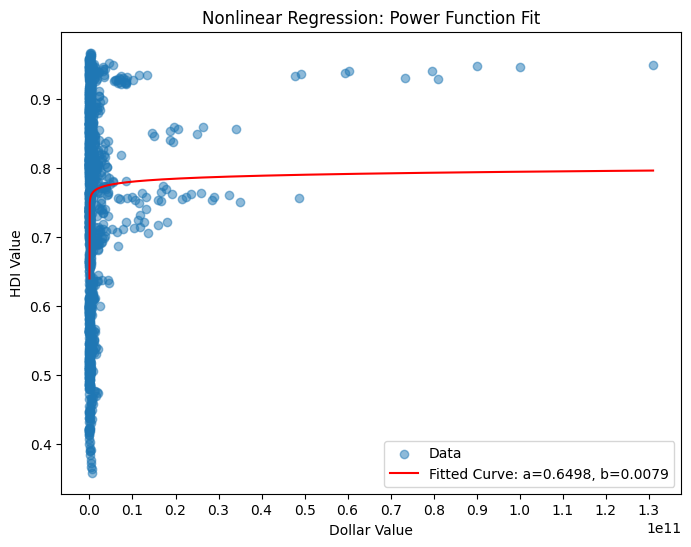

Model Parameters: a = 0.6498, b = 0.0079
R-squared: 0.0275


In [ ]:
# Read data
file_path = "/content/ROres.csv_with_HDI.csv"
df = pd.read_csv(file_path)

# Filter out missing values
df_filtered = df[['dollar_value', 'HDI_value']].dropna()

# Define power function model: HDI = a * (dollar_value^b)
def power_law(x, a, b):
    return a * np.power(x, b)

# Getting data
x_data = df_filtered['dollar_value'].values
y_data = df_filtered['HDI_value'].values

# Perform curve fitting
params, covariance = curve_fit(power_law, x_data, y_data, p0=[0, 0.1])

# Predictive value
y_pred = power_law(x_data, *params)

# Calculate R-squared
ss_res = np.sum((y_data - y_pred) ** 2)
ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Generate curve for plotting
x_fit = np.linspace(min(x_data), max(x_data), 2000)
y_fit = power_law(x_fit, *params)

# Draw a fitting curve
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, alpha=0.5, label="Data")
plt.plot(x_fit, y_fit, color='red', label=f"Fitted Curve: a={params[0]:.4f}, b={params[1]:.4f}")

# Set the horizontal axis unit to 1e10
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1e10))
plt.xlabel("Dollar Value")
plt.ylabel("HDI Value")
plt.title("Nonlinear Regression: Power Function Fit")
plt.legend()
plt.show()

# Output fitting parameters and R-squared
print(f"Model Parameters: a = {params[0]:.4f}, b = {params[1]:.4f}")
print(f"R-squared: {r_squared:.4f}")

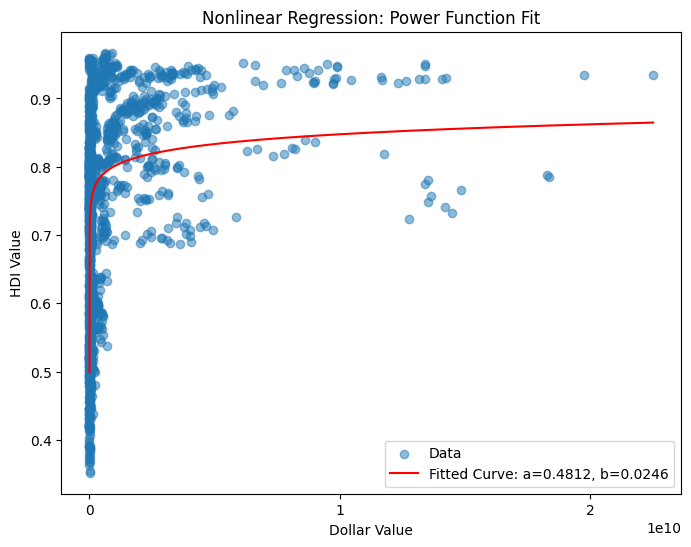

Model Parameters: a = 0.4812, b = 0.0246
R-squared: 0.1923


In [ ]:
# Read data
file_path = "/content/RWood.csv_with_HDI.csv"
df = pd.read_csv(file_path)

# Filter out missing values
df_filtered = df[['dollar_value', 'HDI_value']].dropna()

# Define power function model: HDI = a * (dollar_value^b)
def power_law(x, a, b):
    return a * np.power(x, b)

# Getting data
x_data = df_filtered['dollar_value'].values
y_data = df_filtered['HDI_value'].values

# Perform curve fitting
params, covariance = curve_fit(power_law, x_data, y_data, p0=[0, 0.1])

# Predictive value
y_pred = power_law(x_data, *params)

# Calculate R-squared
ss_res = np.sum((y_data - y_pred) ** 2)
ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Generate curve for plotting
x_fit = np.linspace(min(x_data), max(x_data), 2000)
y_fit = power_law(x_fit, *params)

# Draw a fitting curve
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, alpha=0.5, label="Data")
plt.plot(x_fit, y_fit, color='red', label=f"Fitted Curve: a={params[0]:.4f}, b={params[1]:.4f}")

# Set the horizontal axis unit to 1e10
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1e10))
plt.xlabel("Dollar Value")
plt.ylabel("HDI Value")
plt.title("Nonlinear Regression: Power Function Fit")
plt.legend()
plt.show()

# Output fitting parameters and R-squared
print(f"Model Parameters: a = {params[0]:.4f}, b = {params[1]:.4f}")
print(f"R-squared: {r_squared:.4f}")